# IMPORTS

In [1]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Loading & Analysis

In [2]:
liver_df = pd.read_csv("indian_liver_patient.csv")

In [3]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [7]:
liver_df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [8]:
liver_df = liver_df.dropna()
liver_df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [9]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [10]:
class SimpleLinearModel:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def train(self, features, targets):
        features = np.array(features, dtype=float).flatten()
        targets = np.array(targets, dtype=float)

        n_samples = len(features)

        # Compute necessary sums
        total_x = np.sum(features)
        total_y = np.sum(targets)
        total_xy = np.sum(features * targets)
        total_x2 = np.sum(features ** 2)

        # Calculate slope and intercept
        slope_numerator = (n_samples * total_xy) - (total_x * total_y)
        slope_denominator = (n_samples * total_x2) - (total_x ** 2)
        self.slope = slope_numerator / slope_denominator

        self.intercept = (total_y - self.slope * total_x) / n_samples

    def estimate(self, inputs):
        inputs = np.array(inputs, dtype=float).flatten()
        return (self.slope * inputs) + self.intercept

In [11]:
class BinaryClassifier:
    def __init__(self, step_size=0.5, iterations=100):
        self.weights = None
        self.bias = None
        self.step_size = step_size
        self.iterations = iterations

    def train(self, data, labels):
        data = np.array(data, dtype=float)
        labels = np.array(labels, dtype=float)

        n_data, n_features = data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            for point, label in zip(data, labels):
                prediction = self.classify(point)
                correction = self.step_size * (label - prediction)
                self.weights += correction * point
                self.bias += correction

    def classify(self, data_point):
        data_point = np.array(data_point, dtype=float)
        linear_output = np.dot(data_point, self.weights) + self.bias
        return np.where(linear_output > 0, 1, 0)

In [12]:
print(f"Jumlah data sebelum menghapus duplikat: {len(liver_df)}")
liver_df = liver_df.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {len(liver_df)}")

Jumlah data sebelum menghapus duplikat: 579
Jumlah data setelah menghapus duplikat: 566


In [13]:
liver_df['Dataset'].value_counts()

,count
Dataset,
1,404
2,162


Convert categorical variable "Gender" to indicator variables

In [14]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True


Number of patients diagnosed with liver disease:  404
Number of patients not diagnosed with liver disease:  162


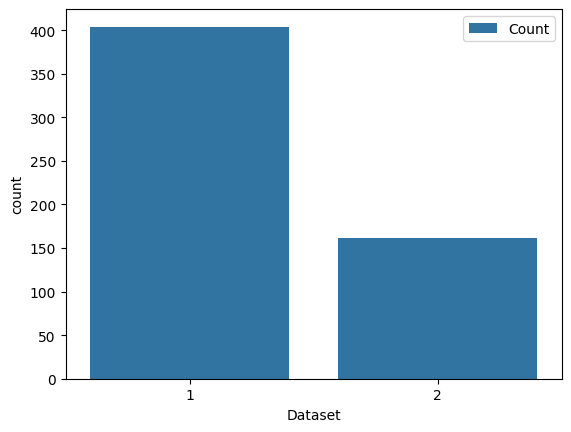

In [15]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  428
Number of patients that are female:  138


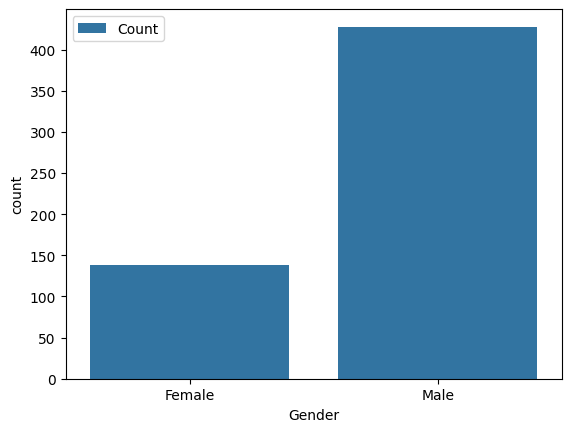

In [16]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

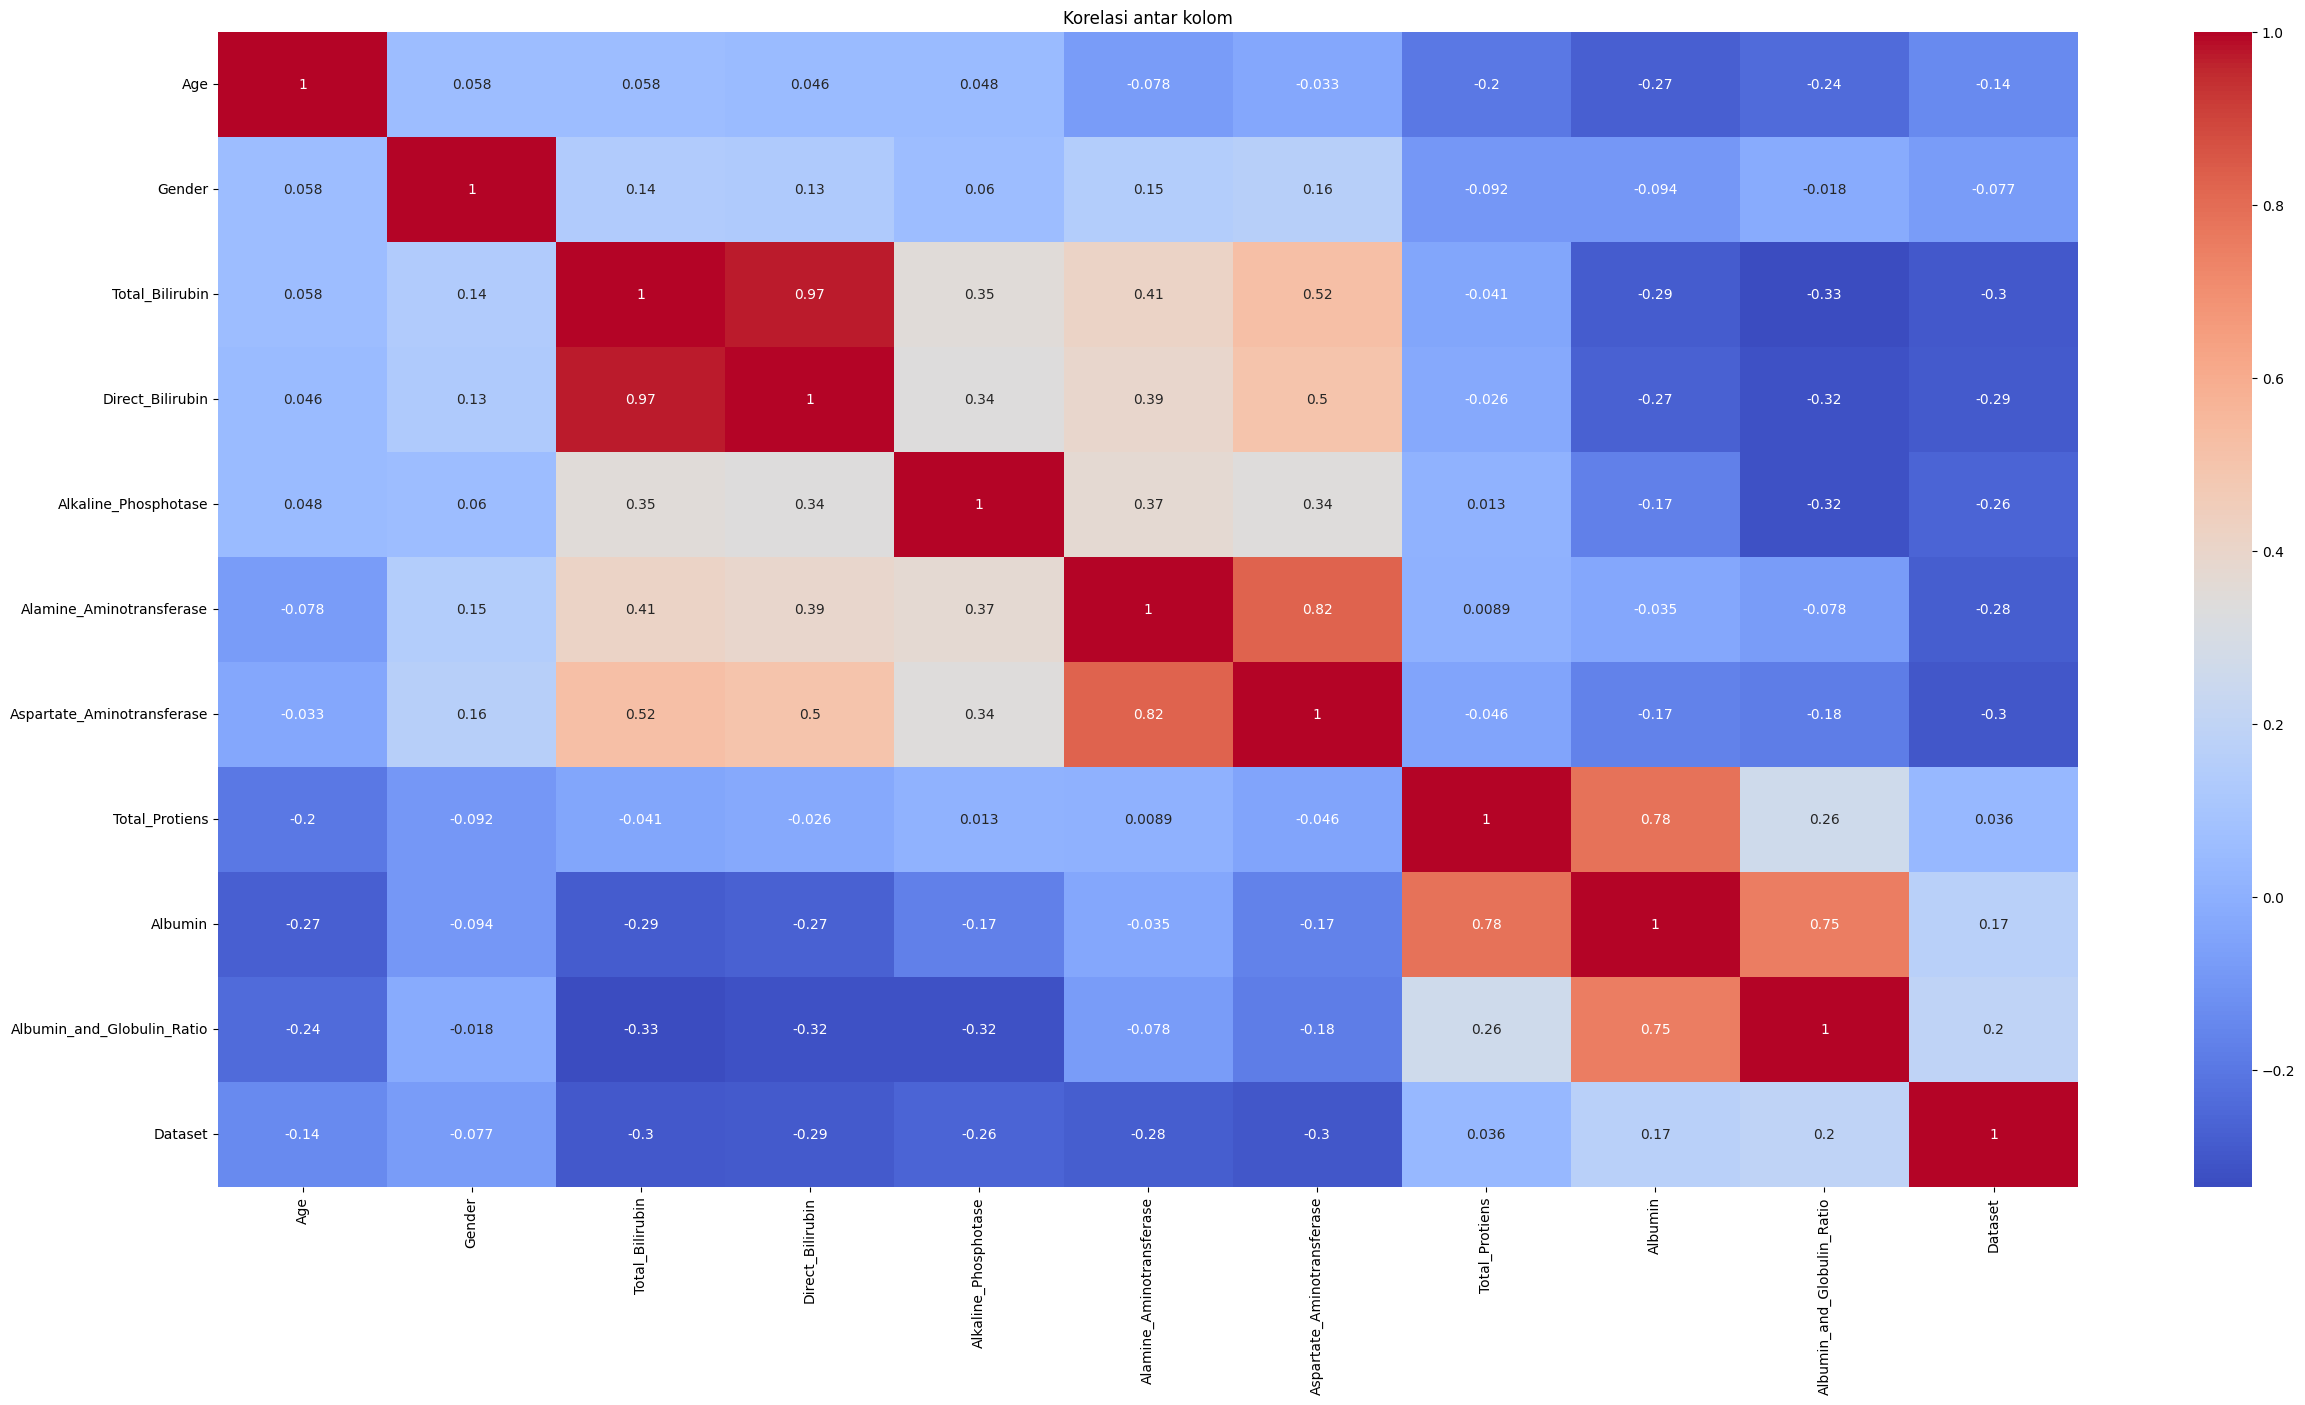

In [17]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

encoder = OrdinalEncoder()

numeric_df = encoder.fit_transform(liver_df)
plt.figure(figsize=(30, 15))
sns.heatmap(pd.DataFrame(numeric_df, columns=liver_df.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar kolom')
plt.show()

Age seems to be a factor for liver disease for both male and female genders

In [18]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,48
3,2,Male,114
0,1,Female,90
1,1,Male,314


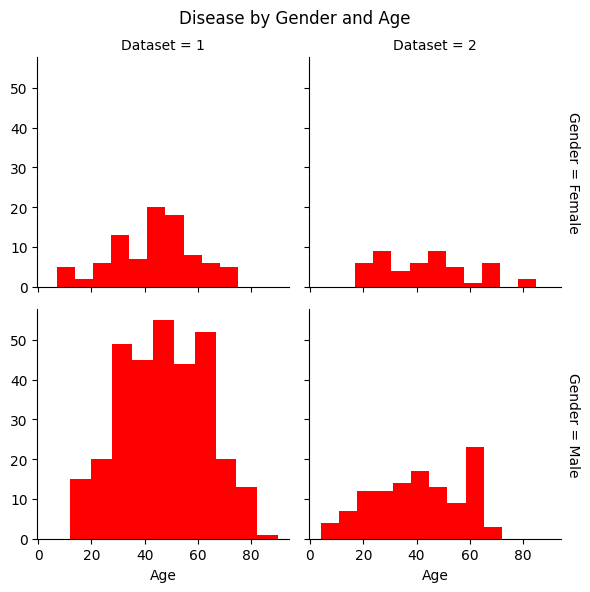

In [19]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

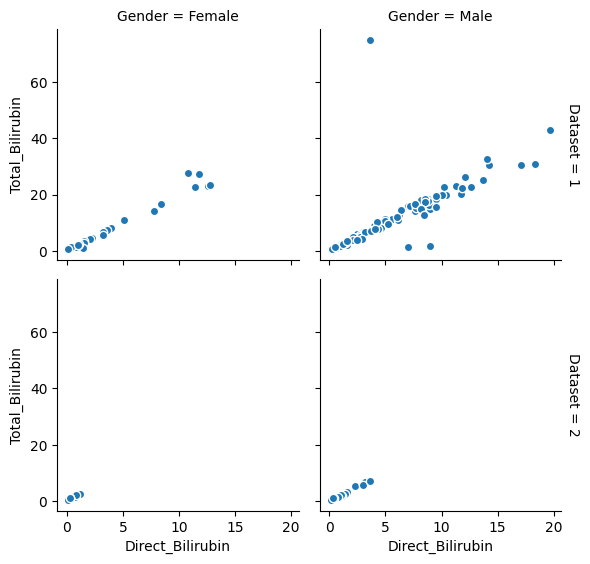

In [20]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. So we have the possibility of removing one of this feature.

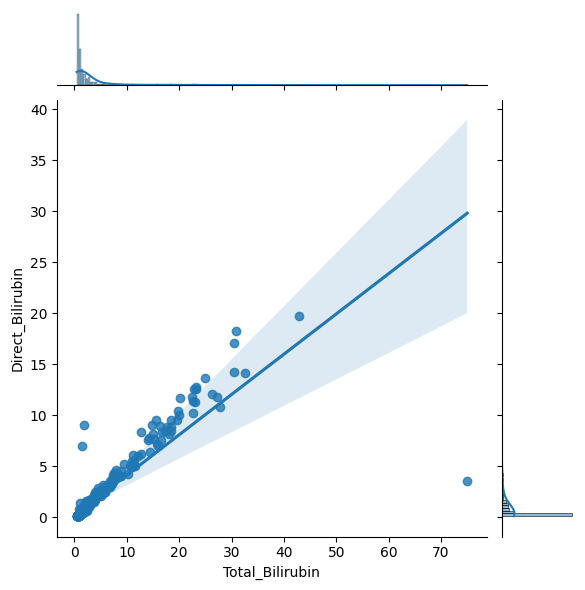

In [21]:
sns.jointplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=liver_df, kind="reg")

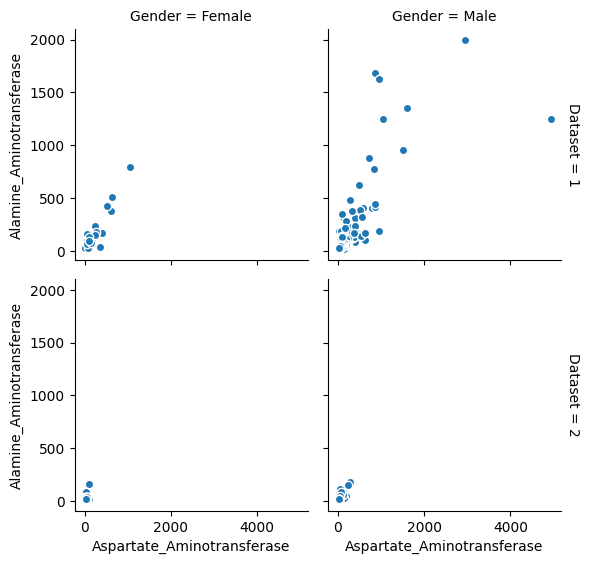

In [22]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)



There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature



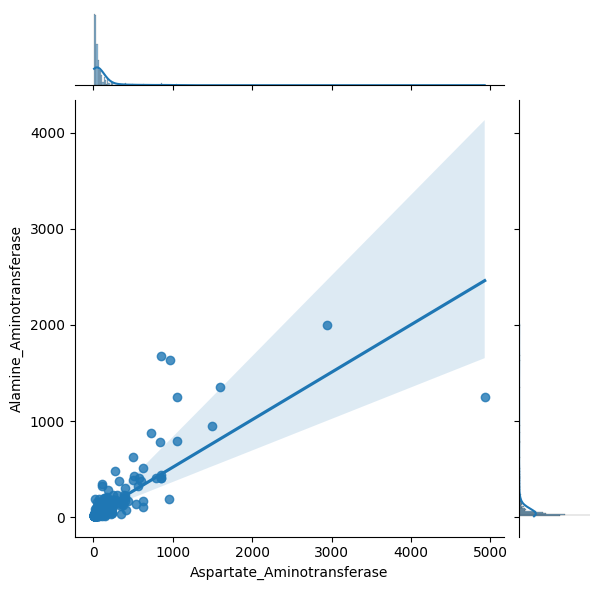

In [23]:
sns.jointplot(x= "Aspartate_Aminotransferase", y="Alamine_Aminotransferase", data=liver_df, kind="reg")

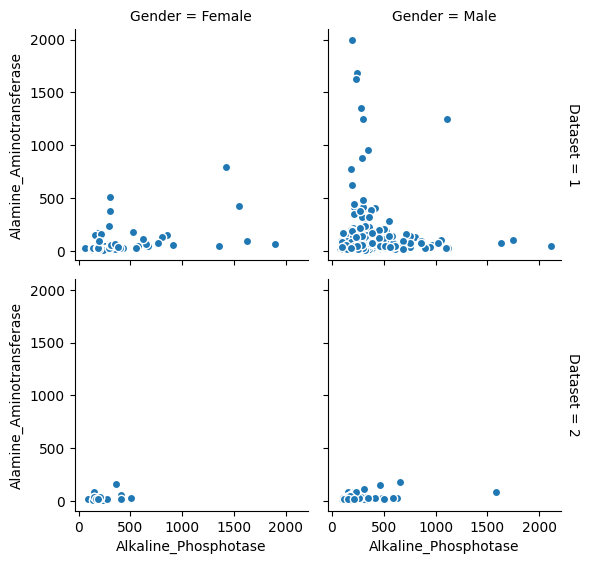

In [24]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

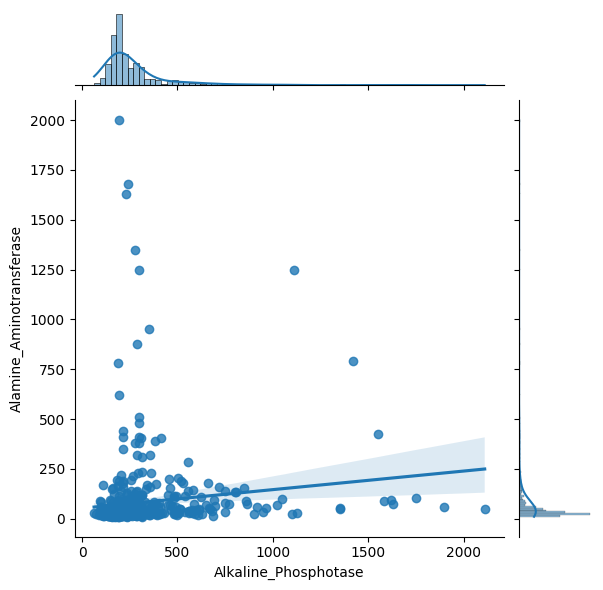

In [25]:
sns.jointplot(x="Alkaline_Phosphotase", y= "Alamine_Aminotransferase", data=liver_df, kind="reg")

No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferas

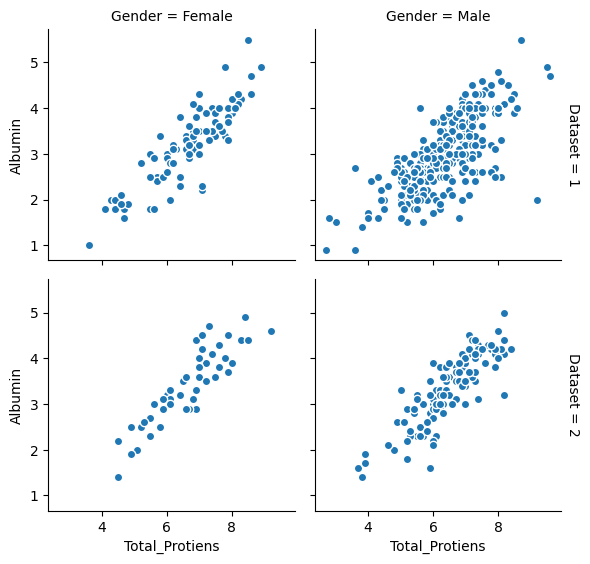

In [26]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature

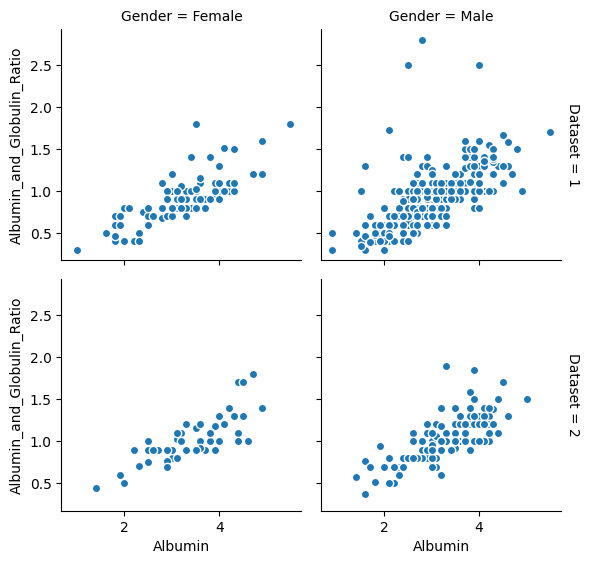

In [27]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.

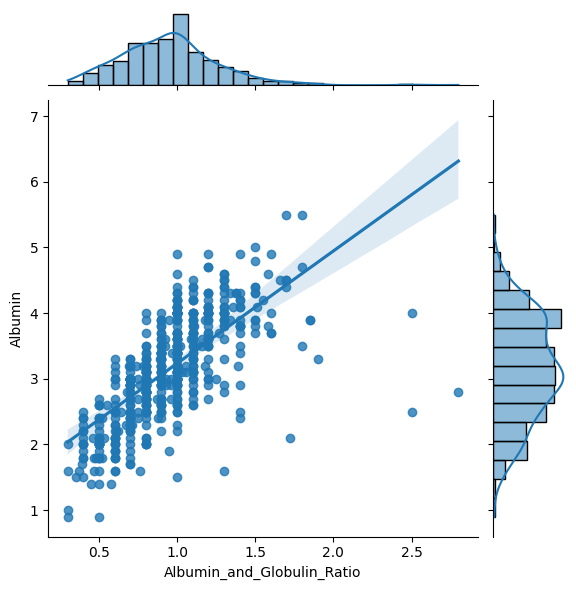

In [28]:
sns.jointplot(x="Albumin_and_Globulin_Ratio", y="Albumin", data=liver_df, kind="reg")

Observation:¶
From the above jointplots and scatterplots, we find direct relationship between the following features:

Direct_Bilirubin & Total_Bilirubin

Aspartate_Aminotransferase & Alamine_Aminotransferase

Total_Protiens & Albumin

Albumin_and_Globulin_Ratio & Albumin

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:

Total_Bilirubin

Alamine_Aminotransferase

Total_Protiens

Albumin_and_Globulin_Ratio

Albumin

In [29]:
pca_data = PCA(n_components=1)

X = liver_df.drop(['Gender','Dataset'],axis=1)
y = liver_df['Dataset']
X

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


In [30]:
y

,Dataset
0,1
1,1
2,1
3,1
4,1
...,...
578,2
579,1
580,1
581,1


In [31]:
# Correlation
liver_corr = X.corr()
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967
Total_Bilirubin,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740
Direct_Bilirubin,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519
Alkaline_Phosphotase,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251
Alamine_Aminotransferase,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525
Aspartate_Aminotransferase,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899
Total_Protiens,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576
Albumin,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438
Albumin_and_Globulin_Ratio,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000


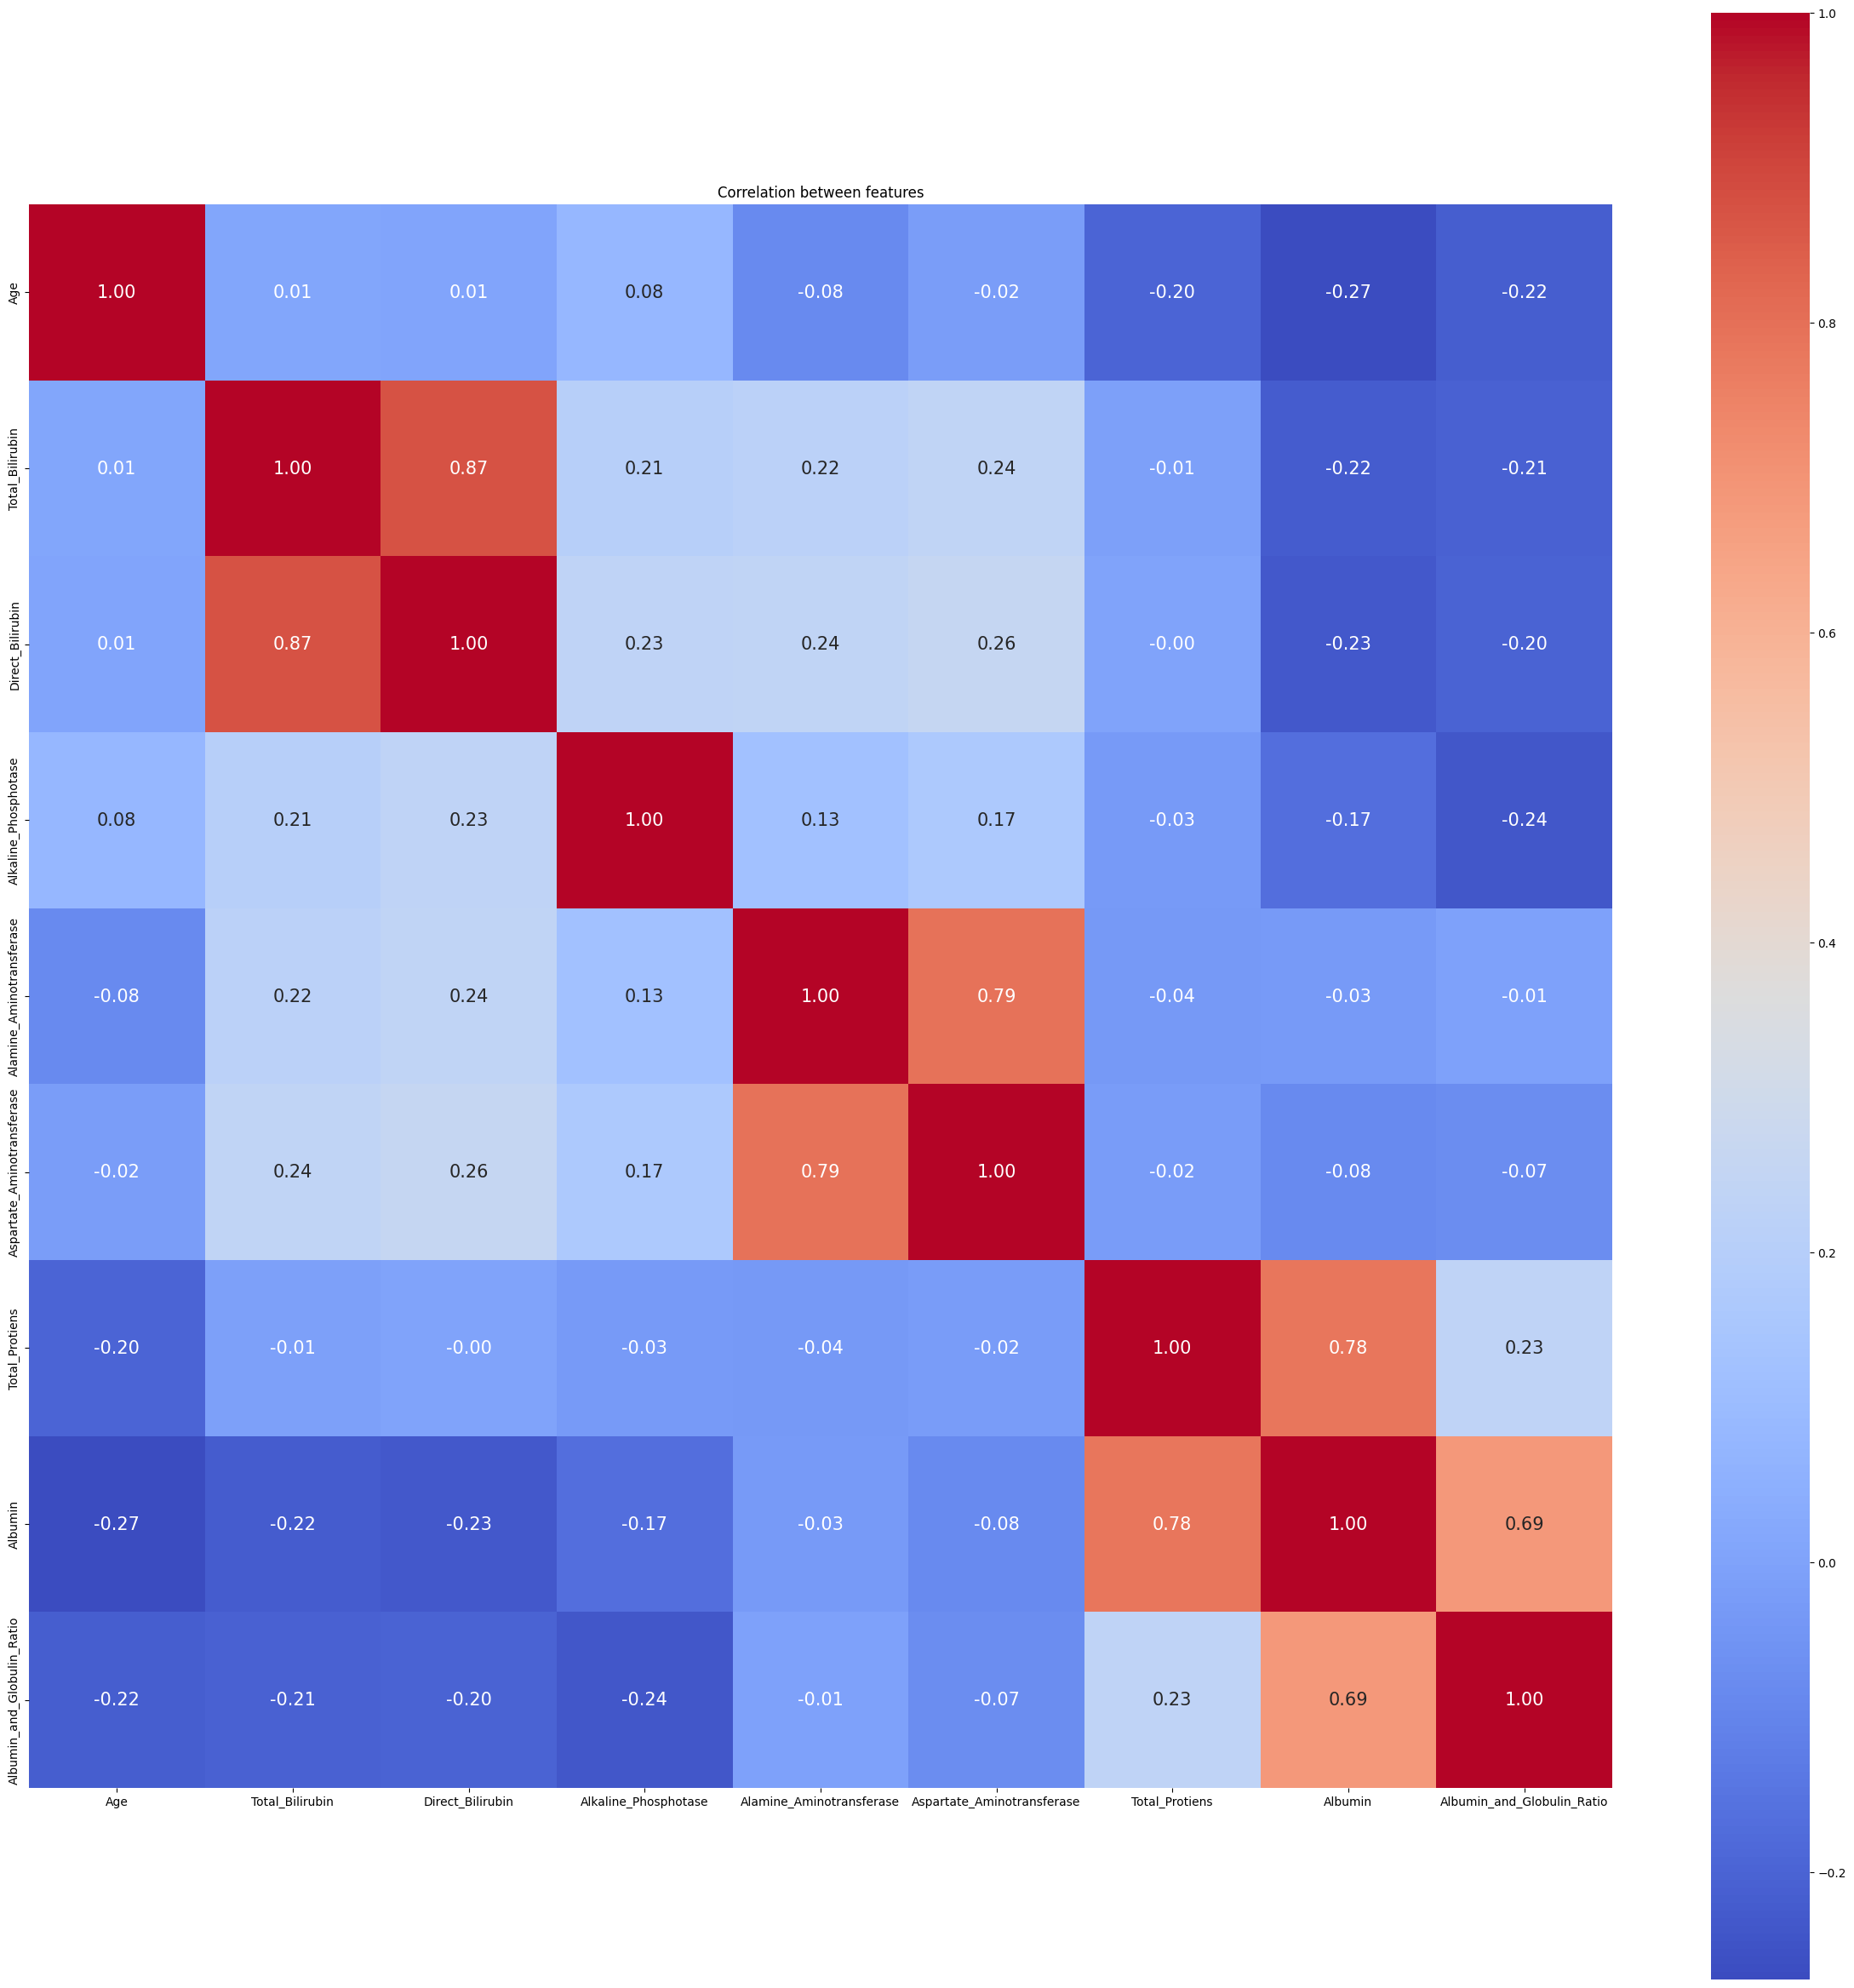

In [32]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

The above correlation also indicates the following correlation

Total_Protiens & Albumin

Alamine_Aminotransferase & Aspartate_Aminotransferase

Direct_Bilirubin & Total_Bilirubin

There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [33]:
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)

In [39]:
from sklearn.model_selection import train_test_split

x_pca = pca_data.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=1)

print(f'Total dataset: {len(X)}')
print(f'Total train dataset: {len(X_train)}')
print(f'Total test dataset: {len(X_test)}')

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')


Total dataset: 566
Total train dataset: 396
Total test dataset: 170
Shape of X: (566, 9)
Shape of y: (566,)


In [40]:
linear_regression = SimpleLinearModel()
multi_perceptron = BinaryClassifier()

linear_regression.train(X_train, y_train)
multi_perceptron.train(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.76      0.98      0.86       130
           2       0.00      0.00      0.00        40

    accuracy                           0.75       170
   macro avg       0.25      0.33      0.29       170
weighted avg       0.58      0.75      0.65       170




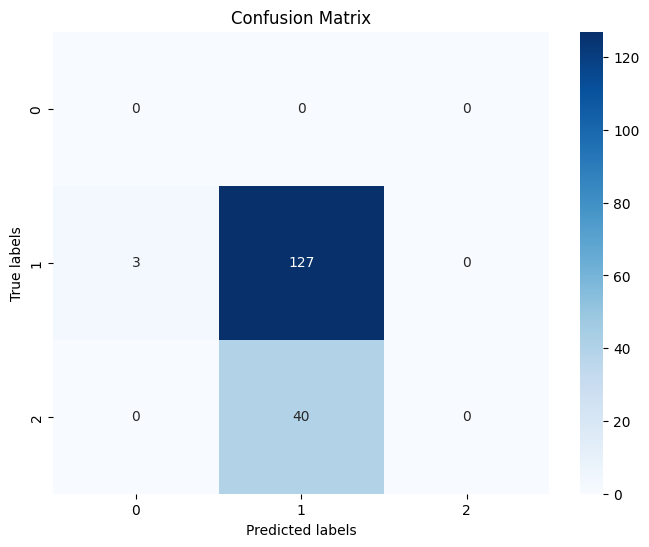

In [43]:
y_pred = linear_regression.estimate(X_test)
y_pred = (y_pred > 0.5).astype(int)
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result, end="\n\n")

linear_regression_metric_reports = {
    "accuracy_score": accuracy_score(y_test, y_pred),
    "precision_score": precision_score(y_test, y_pred, average="macro"),
    "recall_score": recall_score(y_test, y_pred, average="macro"),
    "f1_score": f1_score(y_test, y_pred, average="macro"),
}

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.76      1.00      0.87       130
           2       0.00      0.00      0.00        40

    accuracy                           0.76       170
   macro avg       0.38      0.50      0.43       170
weighted avg       0.58      0.76      0.66       170




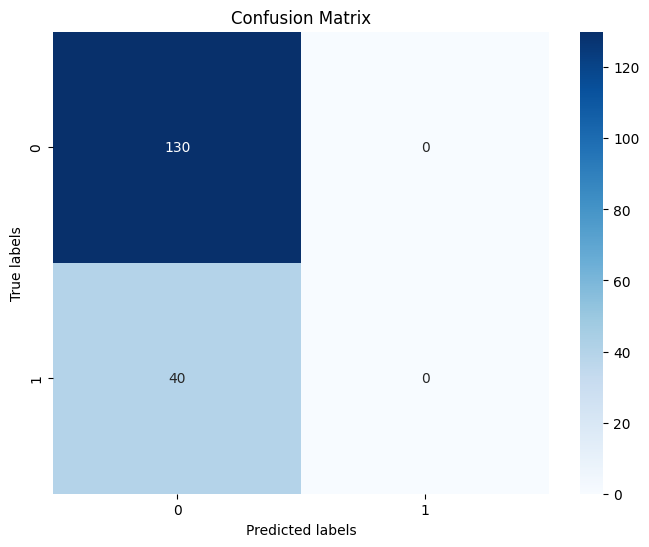

In [45]:
y_pred = multi_perceptron.classify(X_test)
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result, end="\n\n")

multi_perceptron_metric_reports = {
    "accuracy_score": accuracy_score(y_test, y_pred),
    "precision_score": precision_score(y_test, y_pred),
    "recall_score": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
}

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

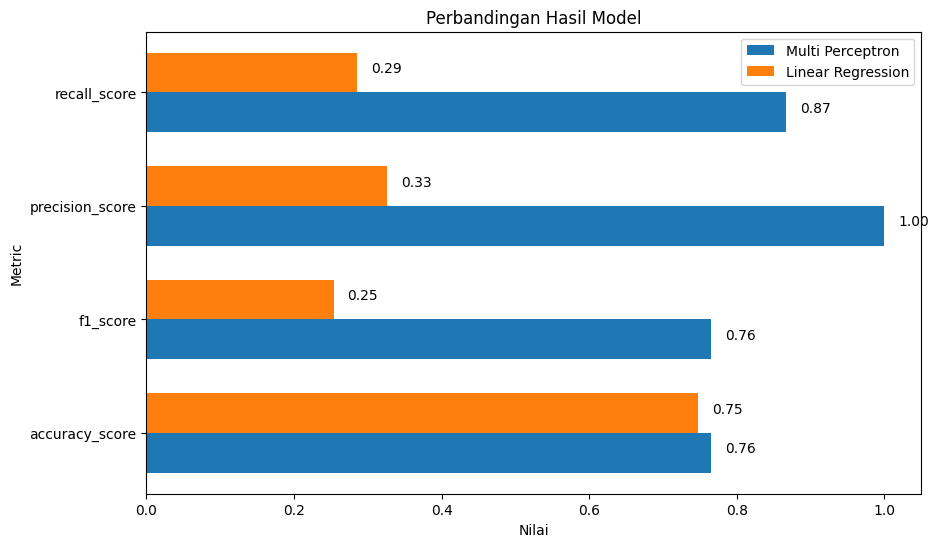

In [46]:
labels = list(set(list(multi_perceptron_metric_reports.keys()) + list(linear_regression_metric_reports.keys())))
labels.sort()

multi_perceptron_data = list(multi_perceptron_metric_reports.values())
linear_regression_data = list(linear_regression_metric_reports.values())

y = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.barh(y - width/2, multi_perceptron_data, width, label='Multi Perceptron')
rects2 = ax.barh(y + width/2, linear_regression_data, width, label='Linear Regression')

for rect1, rect2 in zip(rects1, rects2):
    width1 = rect1.get_width()
    width2 = rect2.get_width()
    ax.annotate(
        f"{width1:.2f}", (width1, rect1.get_y() + rect1.get_height()/2),
        textcoords="offset points", xytext=(10, 0), ha='left'
    )
    ax.annotate(
        f"{width2:.2f}", (width2, rect2.get_y() + rect2.get_height()/2),
        textcoords="offset points", xytext=(10, 0), ha='left'
    )

ax.set_title('Perbandingan Hasil Model')
ax.set_xlabel('Nilai')
ax.set_ylabel('Metric')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()
plt.show()

In [48]:
test_prediction = X_test[:10]
pred_dict = {"y_true": y_test[:10]}
pred_dict['Prediksi Linear Regression'] = linear_regression.estimate(test_prediction)
pred_dict['Prediksi Linear Regression'] = (pred_dict['Prediksi Linear Regression'] > 0.5).astype(int)
pred_dict['Prediksi Multi Perceptron'] = multi_perceptron.classify(test_prediction)
pd.DataFrame(pred_dict)

,y_true,Prediksi Linear Regression,Prediksi Multi Perceptron
570,1,1,1
95,1,1,1
140,2,1,1
177,1,1,1
541,2,1,1
377,2,1,1
263,1,1,1
462,1,1,1
192,1,1,1
531,1,1,1
